In [1]:
import numpy as np
import pickle
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def process_bite_label_steven(label):
    label = label.replace("P","1").replace("D","2").replace("I","3").replace("Q","4")
    label = label.replace("N","5").replace("C","6").replace("S","7").replace("M","8")
    label = label.replace("R","1").replace("L","2").replace("X","-1")
    return int(label)

def process_bite_annots_steven(annots, accel):    
    a = np.zeros((len(annots), 2))
    for i in range(len(annots)):
        s = annots[i].split(",")
        t1 = float(s[0].rstrip())
        t2 = float(s[1].rstrip())
        label = process_bite_label_steven(s[2].rstrip())
        a[i, 0] = t1+t2/2
        a[i, 1] = label
    
    res = []
    hand = 0    
    last_was_bite = False
    for i in range(len(a)):
        #print(a[i, 0], ", ", a[i, 1])
        if a[i,1]==21 or a[i,1] ==22:            
            if last_was_bite:    
                if a[i, 1]==21:
                    hand = 1
                else:
                    hand = 2
            else:
                if hand ==1 and a[i, 1]==21 or hand ==2 and a[i, 1]==22:
                    print( "************************ Similar hand found twice ****************")
                
                hand = 3
            
            last_was_bite = False
            
        elif a[i, 1]==3 or a[i, 1]==4:
            if hand==0:
                print("********** Hand not found : " , annots[i] , ", line no: ", (i + 1))                
                continue
            
            r = [0, 0, 0]
            r[0] = a[i, 0]
            if a[i, 1]==3:    #bite
                r[1] = 1
            else:            #drink
                r[1] = 2
            
            r[2] = hand
            #if hand ==1 or hand ==3: #add right hand data only
            res.append(r)
            
            if last_was_bite:
                print("************************ Bite repeated **************** ", i)
            last_was_bite = True
        
    #print(res)            
    res = np.array(res)
    #print(res.shape)
    #res[:, 0] = time_to_index(accel, res[:, 0])
    res = res.astype(float)
    return res

In [3]:
def read_data_steven_lab():
    path = 'C:\\ASM\\PublicData\\eating_steventech\\lab'
    
    data = [];
    for subject in range(7):
        dsubject = [];
        for sess in range(2):
            #if (subject==0 and sess==0) or (subject==1 and sess==1): #subject 0 sess 0 has data problem, there is no data for subject 1 sess 1
            if subject==1 and sess==1:
                continue
            
            filePathAccel = path + "\\0" + str(subject) + "\\000" + str(sess) + "\\watch_right_000" + str(sess) + ".csv"
            accel = np.genfromtxt(filePathAccel, delimiter=',')            
            duration_right = accel[-1,0]/1e9
            
            filePathAccel = path + "\\0" + str(subject) + "\\000" + str(sess) + "\\watch_left_000" + str(sess) + ".csv"
            accel = np.genfromtxt(filePathAccel, delimiter=',')            
            duration_left = accel[-1,0]/1e9
            
            print("Durations: ", duration_right, duration_left)
            
            filePathAnnots = path + "\\0" + str(subject) + "\\000" + str(sess) + "\\annot_events.csv";
            with open(filePathAnnots) as file:
                annots = file.readlines()                
            annots = process_bite_annots_steven(annots, accel)        
            print("Subject ", str(subject), ", Session ", str(sess), " Annots >> Duration: ", str(annots[0, 0]), " - ", str(annots[-1, 0]), ", Count: "+str(len(annots)) )         
            print(annots[:5, :])
            
            dsess = [duration_right, duration_left, annots]        
            dsubject.append(dsess)        
            
        data.append(dsubject)
    
    #dm.save_data(data, "steven_lab_data", "data")    
    return data
    
    

In [4]:
d = read_data_steven_lab()

Durations:  1439236216.9612274 22748.846600419
Subject  0 , Session  0  Annots >> Duration:  560.4005  -  21149.2371198515 , Count: 155
[[560.4005    1.        3.     ]
 [717.683     1.        1.     ]
 [747.85      1.        1.     ]
 [785.04175   2.        1.     ]
 [815.7       1.        1.     ]]
Durations:  23392.876031962 23391.161307121
************************ Bite repeated ****************  2733
************************ Bite repeated ****************  2774
************************ Bite repeated ****************  2777
************************ Bite repeated ****************  2789
Subject  0 , Session  1  Annots >> Duration:  452.15999999999997  -  23158.018 , Count: 395
[[452.16     2.       3.    ]
 [465.782    1.       1.    ]
 [469.834    1.       1.    ]
 [481.6505   1.       1.    ]
 [490.967    1.       2.    ]]
Durations:  21589.856691755 21589.896660272
Subject  1 , Session  0  Annots >> Duration:  9463.2995  -  20630.0495 , Count: 42
[[9.4632995e+03 1.0000000e+00 3.0000

0, 0 :: 91, 12, 6 :: 39, 3, 4
0, 1 :: 291, 10, 29 :: 45, 5, 15
1, 0 :: 31, 0, 1 :: 10, 0, 0
2, 0 :: 102, 1, 30 :: 8, 9, 3
2, 1 :: 32, 93, 1 :: 9, 9, 0
3, 0 :: 31, 32, 75 :: 2, 26, 1
3, 1 :: 76, 2, 18 :: 16, 5, 3
4, 0 :: 147, 0, 15 :: 26, 0, 0
4, 1 :: 19, 0, 41 :: 18, 2, 11
5, 0 :: 98, 4, 1 :: 15, 3, 0
5, 1 :: 84, 4, 0 :: 10, 2, 7
6, 0 :: 20, 2, 14 :: 0, 12, 0
6, 1 :: 78, 0, 1 :: 5, 5, 0
All bite counts:: 1100, 160, 232 
All sip counts:: 203, 81, 44 
[0.1 1. ]


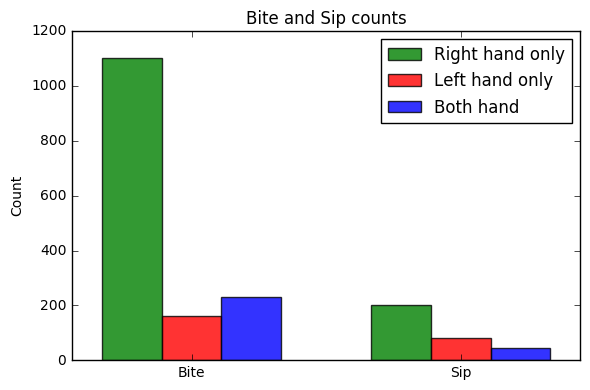

In [49]:
bite_count_left = 0
bite_count_right = 0
bite_count_both = 0

sip_count_left = 0
sip_count_right = 0
sip_count_both = 0

for subject in range(len(d)):
    subject_data = d[subject]
    for sess in range(len(subject_data)):
        #rd = d[subject][sess][0]/3600
        #rl = d[subject][sess][1]/3600
        #print('{}, {} :: {}, {}'.format(subject, sess, rd, rl))        
        a = d[subject][sess][2]
        bcr = len(a[(a[:, 1]==1) & (a[:, 2]==1), :])                     
        bcl = len(a[(a[:, 1]==1) & (a[:, 2]==2), :])
        bcb = len(a[(a[:, 1]==1) & (a[:, 2]==3), :])
        scr = len(a[(a[:, 1]==2) & (a[:, 2]==1), :])                     
        scl = len(a[(a[:, 1]==2) & (a[:, 2]==2), :])
        scb = len(a[(a[:, 1]==2) & (a[:, 2]==3), :])
        print('{}, {} :: {}, {}, {} :: {}, {}, {}'.format(subject, sess, bcr, bcl, bcb, scr, scl, scb)) 
        
        bite_count_right += bcr
        bite_count_left += bcl
        bite_count_both += bcb
     
        sip_count_right += scr
        sip_count_left += scl
        sip_count_both += scb
                     
print('All bite counts:: {}, {}, {} '.format(bite_count_right, bite_count_left, bite_count_both)) 
print('All sip counts:: {}, {}, {} '.format(sip_count_right, sip_count_left, sip_count_both)) 

n_groups = 2
fig, ax = plt.subplots()
index = np.array([0.1, 1]) #np.arange(n_groups)
print(index)
bar_width = 0.2
opacity = 0.8

res = [bite_count_right, sip_count_right]
rects1 = plt.bar(index, res, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Right hand only')
 
res = [bite_count_left, sip_count_left]
rects1 = plt.bar(index+bar_width, res, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Left hand only')

res = [bite_count_both, sip_count_both]
rects1 = plt.bar(index+2*bar_width, res, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Both hand')
 
#plt.xlabel('Person')
plt.ylabel('Count')
plt.title('Bite and Sip counts')
plt.xticks(index + 1.5*bar_width, ('Bite', 'Sip'))
plt.legend()
#plt.grid(True)
plt.xlim([0, 1.7])

#plt.grid()
plt.tight_layout()
plt.show()


1566
0.8939974457215836


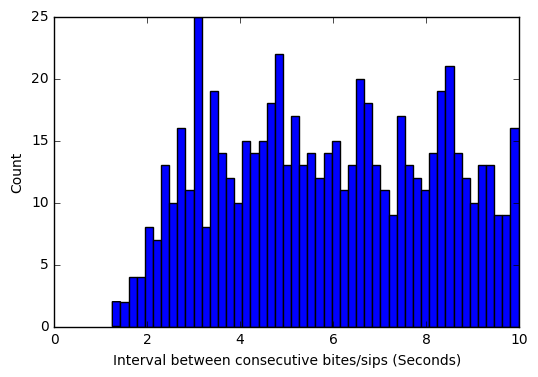

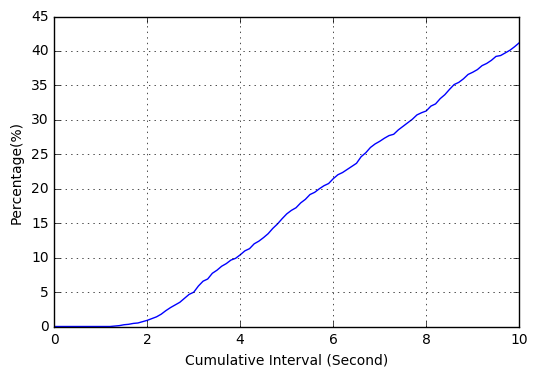

In [103]:
all_diff = []
for subject in range(len(d)):
    subject_data = d[subject]
    for sess in range(len(subject_data)):       
        a = d[subject][sess][2]
        a = a[(a[:, 2]==1) | (a[:, 2]==3), 0]
        
        diff = np.diff(a, 1)
        all_diff = np.concatenate((all_diff, diff))

print(len(all_diff))
a = all_diff[all_diff<=10]
fig, ax = plt.subplots()
plt.hist(a, bins=50)
plt.xlim([0, 10])
plt.xlabel('Interval between consecutive bites/sips (Seconds)')
plt.ylabel('Count')

res = []
total = len(all_diff)
for i in np.arange(0, 10.1, 0.1):
    c = all_diff[all_diff<=i]
    c = len(c)/total*100 
    #print(i, c)
    res.append([i, c])
    if i==2:
        print(c)

res = np.asarray(res)
fig, ax = plt.subplots()
plt.plot(res[:, 0], res[:, 1])
plt.xlim([0, 10])
plt.xlabel('Cumulative Interval (Second)')
plt.ylabel('Percentage(%)')
plt.grid(True)